In [13]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Create DataFrame
customers_df = pd.read_csv('/Users/bcoeur34/Desktop/Python in data camp and others  /customer_data.csv')
sales_df = pd.read_csv('/Users/bcoeur34/Desktop/Python in data camp and others  /sales_data .csv')

In [15]:
# Print sales and sales 
sales_df.head(5)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon


In [16]:
# Print customers
customers_df.head(5)

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [17]:
# lets see if there any missing data
for col in sales_df.columns:
    pct_missing = np.mean(sales_df[col].isnull())
    print('{} - {}%' .format(col, pct_missing))

invoice_no - 0.0%
customer_id - 0.0%
category - 0.0%
quantity - 0.0%
price - 0.0%
invoice_date - 0.0%
shopping_mall - 0.0%


In [18]:
sales_df.dtypes
customers_df.dtypes

customer_id        object
gender             object
age               float64
payment_method     object
dtype: object

In [19]:
# Create a list of dictionaries with new data
customer_data_list = [
  {'customer_id': 'C241288', 'gender': 'Female', 'age': 28.0, 'payment_method': 'Credit Card'},
  {'customer_id': 'C111565', 'gender': 'Male', 'age': 21.0, 'payment_method': 'Debit Card'}
]
sales_data_list = [
  {'invoice_no': 'I138884', 'customer_id': 'C241288', 'category': 'Clothing', 'quantity': 5, 'price': 1500.4, 'invoice_date': '05-08-2022', 'shopping_mall': 'Kanyon'},
  {'invoice_no': 'I317333', 'customer_id': 'C111565', 'category': 'Shoes', 'quantity': 3, 'price': 1800.51, 'invoice_date': '12-12-2021', 'shopping_mall': 'Forum Istanbul'}
]

In [20]:
# find the most expensive price 
most_expensive_price = sales_df['price'].max()
print("The most expensive price is:", most_expensive_price)

The most expensive price is: 5250.0


In [21]:
# Calculate the running total of the price column
sales_df['running_total'] = sales_df['price'].cumsum()
# Display the result
print(sales_df[['price', 'running_total']])

         price  running_total
0      1500.40   1.500400e+03
1      1800.51   3.300910e+03
2       300.08   3.600990e+03
3      3000.85   6.601840e+03
4        60.60   6.662440e+03
...        ...            ...
99452    58.65   6.854711e+07
99453    10.46   6.854712e+07
99454    10.46   6.854713e+07
99455  4200.00   6.855133e+07
99456    35.19   6.855137e+07

[99457 rows x 2 columns]


In [22]:
# handling missing values 
# Check for missing values
print(sales_df.isnull().sum())

invoice_no       0
customer_id      0
category         0
quantity         0
price            0
invoice_date     0
shopping_mall    0
running_total    0
dtype: int64


In [23]:
#Drop Missing Values
# If you want to remove rows or columns with missing values:
# Drop rows with any missing values
sales_df_cleaned = sales_df.dropna()

# Drop only specific columns with missing values
sales_df_cleaned = sales_df.dropna(subset=['price', 'quantity'])

In [26]:
# grouping with multiple conditions
# Group by category and shopping mall, then sum the prices
grouped_sales = sales_df.groupby(['category', 'shopping_mall'])['price'].sum().reset_index()
grouped_sales.head()

,category,shopping_mall,price
0,Books,Cevahir AVM,11998.80
1,Books,Emaar Square Mall,11059.50
2,Books,Forum Istanbul,11453.40
3,Books,Istinye Park,20725.20
4,Books,Kanyon,44980.35


In [28]:
# Group and Aggregate Multiple Metrics
grouped_stats = sales_df.groupby(['category', 'shopping_mall']).agg(
    total_sales=('price', 'sum'),
    avg_price=('price', 'mean'),
    total_quantity=('quantity', 'sum')
).reset_index()

grouped_stats.head()

,category,shopping_mall,total_sales,avg_price,total_quantity
0,Books,Cevahir AVM,11998.80,46.506977,792
1,Books,Emaar Square Mall,11059.50,46.862288,730
2,Books,Forum Istanbul,11453.40,45.450000,756
3,Books,Istinye Park,20725.20,44.859740,1368
4,Books,Kanyon,44980.35,44.403110,2969


In [29]:
# Merge customer and sales data on 'customer_id'
merged_df = pd.merge(sales_df, customers_df, on="customer_id", how="left")
merged_df.head(5)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,running_total,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,1500.40,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,3300.91,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,3600.99,Male,20.0,Cash
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM,6601.84,Female,66.0,Credit Card
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,6662.44,Female,53.0,Cash


In [31]:
# INNER JOIN (only matching records from both tables)
inner_join = pd.merge(sales_df, customers_df, on="customer_id", how="inner")
inner_join.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,running_total,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,1500.40,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,3300.91,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,3600.99,Male,20.0,Cash
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM,6601.84,Female,66.0,Credit Card
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,6662.44,Female,53.0,Cash


In [32]:
# LEFT JOIN (all records from sales_df, matching from customer_df)
left_join = pd.merge(sales_df, customers_df, on="customer_id", how="left")
left_join.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,running_total,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,1500.40,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,3300.91,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,3600.99,Male,20.0,Cash
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM,6601.84,Female,66.0,Credit Card
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,6662.44,Female,53.0,Cash


In [33]:
# RIGHT JOIN (all records from customer_df, matching from sales_df)
right_join = pd.merge(sales_df, customers_df, on="customer_id", how="right")
right_join.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,running_total,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,1500.40,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,3300.91,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,3600.99,Male,20.0,Cash
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM,6601.84,Female,66.0,Credit Card
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,6662.44,Female,53.0,Cash


In [35]:
outer_join = pd.merge(sales_df, customers_df, on="customer_id", how="outer")
outer_join.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,running_total,gender,age,payment_method
0,I178410,C100004,Clothing,5,1500.40,26-11-2021,Metrocity,2.905125e+07,Male,61.0,Credit Card
1,I158163,C100005,Shoes,2,1200.34,03-03-2023,Kanyon,5.558789e+07,Male,34.0,Cash
2,I262373,C100006,Toys,3,107.52,01-12-2022,Cevahir AVM,9.001427e+06,Male,44.0,Credit Card
3,I334895,C100012,Food & Beverage,5,26.15,15-08-2021,Kanyon,3.685953e+07,Male,25.0,Cash
4,I202043,C100019,Toys,1,35.84,25-07-2021,Metrocity,2.814503e+06,Female,21.0,Credit Card


In [36]:
# Create a new column for total sales amount
merged_df['sales_amount'] = merged_df['quantity'] * merged_df['price']

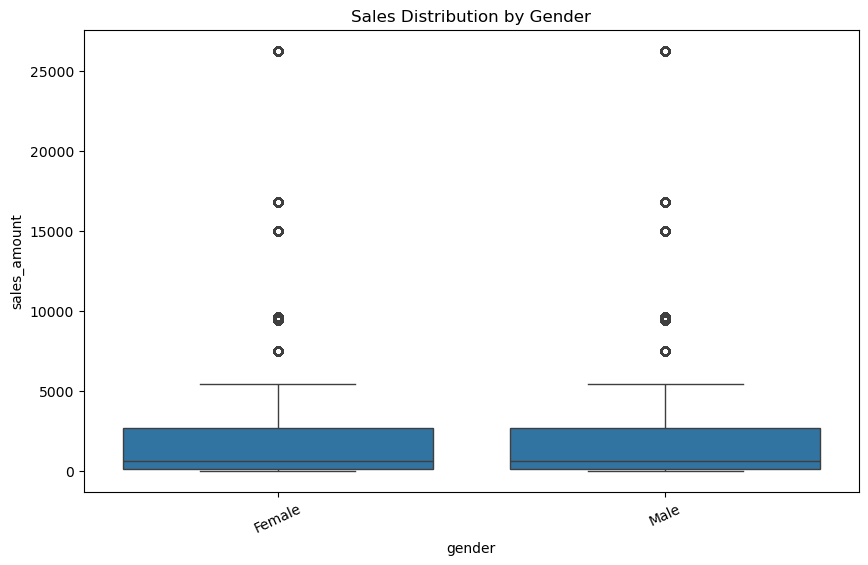

In [37]:
# Seaborn visualization: Sales distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='sales_amount', data=merged_df)
plt.title('Sales Distribution by Gender')
plt.xticks(rotation=25)
plt.show()

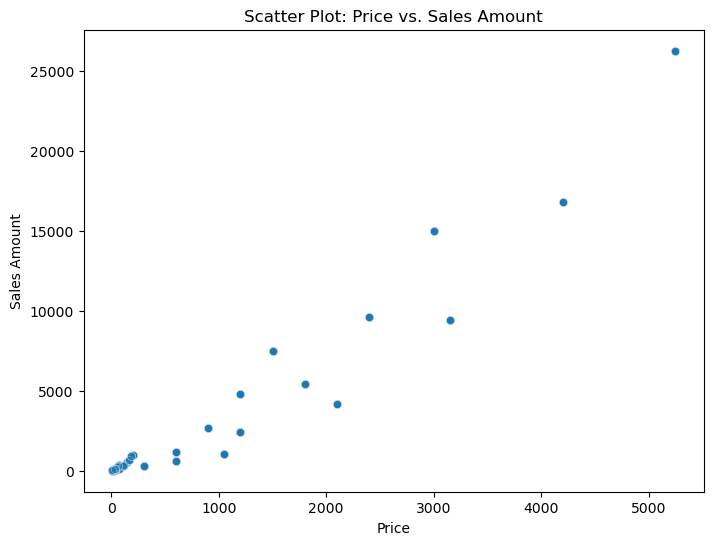

In [38]:
# Scatter plot to analyze relationship between price and sales amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='sales_amount', data=merged_df, alpha=0.5)
plt.title('Scatter Plot: Price vs. Sales Amount')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.show()

<Axes: xlabel='price', ylabel='sales_amount'>

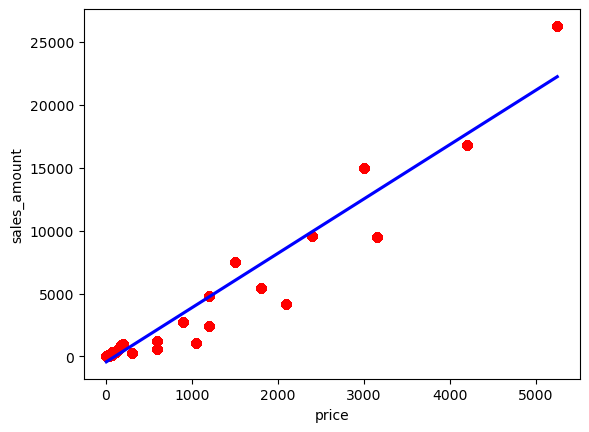

In [41]:
sns.regplot(x='price', y='sales_amount', data=merged_df, scatter_kws= {"color": "red"}, line_kws={"color":"blue"})

In [155]:
# now check duplicate  on sales, customers id
customers_df.duplicated()
sales_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99452    False
99453    False
99454    False
99455    False
99456    False
Length: 99457, dtype: bool

In [43]:
# Sort sales data by invoice_date (descending) and customer_id (ascending)
sales_dfsorted = sales_df.sort_values(by=['invoice_date', 'customer_id'], ascending=[False, True], inplace=False)
sales_dfsorted.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,running_total
28633,I500960,C100490,Clothing,4,1200.32,31-12-2022,Viaport Outlet,1.961897e+07
86199,I199565,C102461,Clothing,3,900.24,31-12-2022,Cevahir AVM,5.954667e+07
90825,I754930,C103909,Clothing,3,900.24,31-12-2022,Emaar Square Mall,6.263775e+07
2167,I699353,C108003,Toys,5,179.20,31-12-2022,Metropol AVM,1.481540e+06
24423,I822599,C108450,Food & Beverage,3,15.69,31-12-2022,Metropol AVM,1.671303e+07


In [339]:
# Sort customer data by customer_id (ascending)
customers_sorted = customers.sort_values(by=['customer_id'], ascending=True, inplace=False)
customers_sorted.head()

,customer_id,gender,age,payment_method
42195,C100004,Male,61.0,Credit Card
80560,C100005,Male,34.0,Cash
13070,C100006,Male,44.0,Credit Card
53587,C100012,Male,25.0,Cash
4073,C100019,Female,21.0,Credit Card


In [337]:
# pd.set_option('display.max_rows', None)

In [341]:
# sales_sorted['invoice_no'].drop_duplicates().sort_values(ascending=False)

In [44]:
# Compute correlation matrix for numeric columns
numeric_columns = ['age', 'quantity', 'price', 'sales_amount']
correlation_matrix = merged_df[numeric_columns].corr()
correlation_matrix

,age,quantity,price,sales_amount
age,1.000000,0.000593,0.001695,0.002723
quantity,0.000593,1.000000,0.344880,0.461173
price,0.001695,0.344880,1.000000,0.962372
sales_amount,0.002723,0.461173,0.962372,1.000000


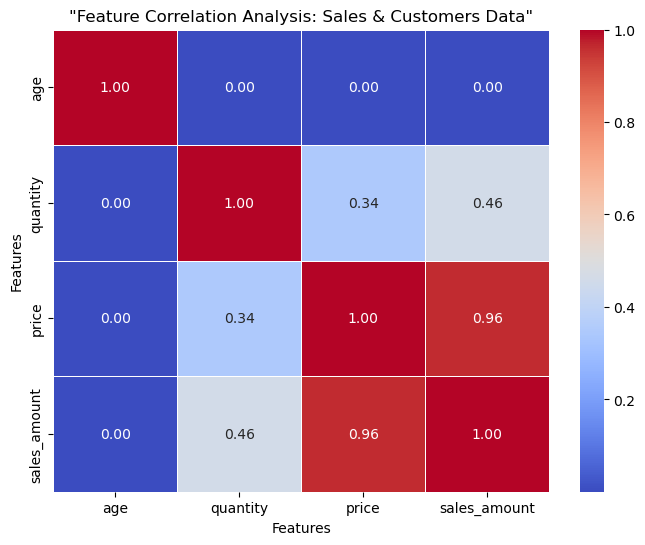

In [75]:
# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('"Feature Correlation Analysis: Sales & Customers Data"')
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [48]:
# How many unique customers are there?
num_unique_customers = customers_df['customer_id'].nunique()
num_unique_customers

99457

In [55]:
# What is the distribution of customers by payment method?

if 'payment_method' in customers_df.columns:
    payment_distribution = customers_df['payment_method'].value_counts()
payment_distribution

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [58]:
# Which age group has the highest number of customers?

if 'age' in customers_df.columns:
    customers_df['age_group'] = pd.cut(customers_df['age'], bins=[18, 25, 35, 50, 100], 
                                      labels=['18-25', '26-35', '36-50', '50+'])
    age_distribution = customers_df['age_group'].value_counts()
age_distribution


age_group
50+      36054
36-50    28907
26-35    19034
18-25    13500
Name: count, dtype: int64

In [62]:
# Calculate total sales for each category?
total_sales_per_category = sales_df.groupby('category')['price'].sum()
total_sales_per_category.head(5)

category
Books                226977.30
Clothing           31075684.64
Cosmetics           1848606.90
Food & Beverage      231568.71
Shoes              18135336.89
Name: price, dtype: float64

In [65]:
# count the number of transactions per customer?
transactions_per_customer = sales_df['customer_id'].value_counts()
transactions_per_customer.head()

customer_id
C241288    1
C116138    1
C382765    1
C285074    1
C405356    1
Name: count, dtype: int64

In [70]:
# Convert the invoice_date column to a datetime format?
sales_df['invoice_date'] = pd.to_datetime(sales_df['invoice_date'], format="%d-%m-%Y")
sales_df.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,running_total
0,I138884,C241288,Clothing,5,1500.40,2022-08-05,Kanyon,1500.40
1,I317333,C111565,Shoes,3,1800.51,2021-12-12,Forum Istanbul,3300.91
2,I127801,C266599,Clothing,1,300.08,2021-11-09,Metrocity,3600.99
3,I173702,C988172,Shoes,5,3000.85,2021-05-16,Metropol AVM,6601.84
4,I337046,C189076,Books,4,60.60,2021-10-24,Kanyon,6662.44


In [72]:
# Find the top 5 customers who made the highest total purchases?
top_customers = sales_df.groupby('customer_id')['price'].sum().nlargest(5)
top_customers

customer_id
C100168    5250.0
C100306    5250.0
C100322    5250.0
C100607    5250.0
C101216    5250.0
Name: price, dtype: float64

In [74]:
# Check the correlation between age and price spent?
correlation = merged_df[['age', 'price']].corr()

,age,price
age,1.000000,0.001695
price,0.001695,1.000000


In [78]:
# Count how many customers prefer each payment method?
payment_counts = customers_df['payment_method'].value_counts()
payment_counts

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [80]:
# Create pivot table to see total sales per shopping mall?
pivot_table = sales_df.pivot_table(values="price", index="shopping_mall", aggfunc="sum")
pivot_table.head()

,price
shopping_mall,
Cevahir AVM,3433671.84
Emaar Square Mall,3390408.31
Forum Istanbul,3336073.82
Istinye Park,6717077.54
Kanyon,13710755.24


In [81]:
# Find the average quantity purchased for each product category?
avg_quantity = sales_df.groupby('category')['quantity'].mean()
avg_quantity

category
Books              3.007830
Clothing           3.002813
Cosmetics          3.011525
Food & Beverage    2.996548
Shoes              3.011461
Souvenir           2.974795
Technology         3.006605
Toys               3.005948
Name: quantity, dtype: float64

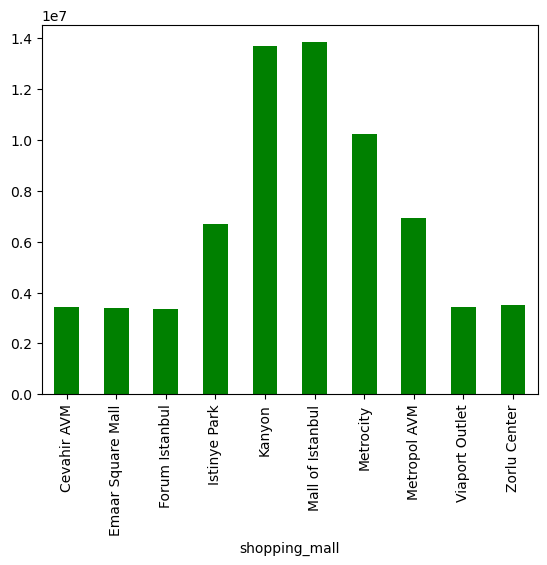

In [87]:
# visualize the distribution of total sales per shopping mall?
sales_df.groupby('shopping_mall')["price"].sum().plot(kind='bar', color='green')
plt.show()

<Axes: xlabel='invoice_date'>

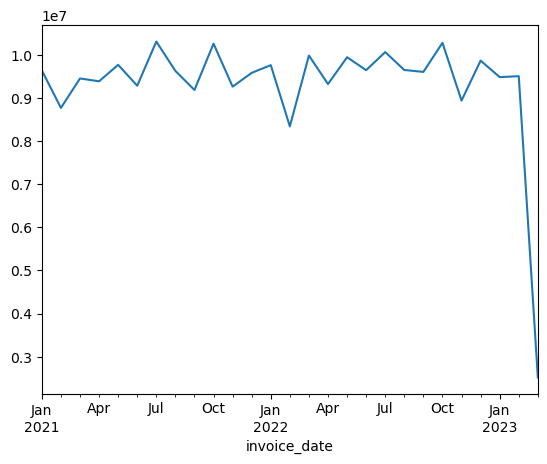

In [111]:
# Perform a time series analysis to see sales trends over time?
sales_df['invoice_date'] = pd.to_datetime(sales_df['invoice_date'])
sales_trend = sales_df.groupby(sales_df['invoice_date'].dt.to_period("M"))['total_amount'].sum()
sales_trend.plot()

In [94]:
#  write a function to classify customers into age groups Youth, Adult, Senior?
def age_group(age):
    if age < 23:
        return "Youth"
    elif age < 50:
        return "Adult"
    else:
        return "Senior"

customers_df['age_group'] = customers_df['age'].apply(age_group)
customers_df.head()

,customer_id,gender,age,payment_method,age_group
0,C241288,Female,28.0,Credit Card,Adult
1,C111565,Male,21.0,Debit Card,Youth
2,C266599,Male,20.0,Cash,Youth
3,C988172,Female,66.0,Credit Card,Senior
4,C189076,Female,53.0,Cash,Senior


In [120]:
# Subset customers  using square brackets Subset Based on a Condition Age > 30)
subset_customers = customers_df[customers_df['age'] > 30]
subset_customers.head()

,customer_id,gender,age,payment_method,age_group
3,C988172,Female,66.0,Credit Card,Senior
4,C189076,Female,53.0,Cash,Senior
6,C151197,Female,49.0,Cash,Adult
7,C176086,Female,32.0,Credit Card,Adult
8,C159642,Male,69.0,Credit Card,Senior


In [121]:
# Subset Based on Multiple Conditions Age > 30 and Payment Method is 'Credit Card')
subset_customers = customers_df[(customers_df['age'] > 30) & (customers_df['payment_method'] == 'Credit Card')]
subset_customers.head()

,customer_id,gender,age,payment_method,age_group
3,C988172,Female,66.0,Credit Card,Senior
7,C176086,Female,32.0,Credit Card,Adult
8,C159642,Male,69.0,Credit Card,Senior
9,C283361,Female,60.0,Credit Card,Senior
14,C555402,Female,67.0,Credit Card,Senior


In [97]:
# find the most frequently visited shopping mall by customers?
most_frequent_mall = sales_df['shopping_mall'].mode()
most_frequent_mall

0    Mall of Istanbul
Name: shopping_mall, dtype: object

In [109]:
# find the top-selling category in each shopping mall?
top_category_per_mall = sales_df.groupby(["shopping_mall", "category"])["total_amount"].sum().reset_index()
top_category_per_mall = top_category_per_mall.loc[top_category_per_mall.groupby("shopping_mall")["total_amount"].idxmax()]
top_category_per_mall.head()

,shopping_mall,category,total_amount
1,Cevahir AVM,Clothing,5706321.28
9,Emaar Square Mall,Clothing,5590490.40
17,Forum Istanbul,Clothing,5792444.24
25,Istinye Park,Clothing,11253900.24
33,Kanyon,Clothing,22609527.60


In [104]:
# apply one-hot encoding to the payment_method column?
encoded_df = pd.get_dummies(customers_df, columns=['payment_method'])
encoded_df.head()

,customer_id,gender,age,age_group,payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card
0,C241288,Female,28.0,Adult,False,True,False
1,C111565,Male,21.0,Youth,False,False,True
2,C266599,Male,20.0,Youth,True,False,False
3,C988172,Female,66.0,Senior,False,True,False
4,C189076,Female,53.0,Senior,True,False,False
...,...,...,...,...,...,...,...
99452,C441542,Female,45.0,Adult,False,True,False
99453,C569580,Male,27.0,Adult,True,False,False
99454,C103292,Male,63.0,Senior,False,False,True
99455,C800631,Male,56.0,Senior,True,False,False


In [112]:
# build a machine learning model to predict the likelihood of a customer making a high purchase?
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

sales_df['high_spender'] = (sales_df['total_amount'] > 5000).astype(int)
X = sales_df[['quantity', 'price']]
y = sales_df['high_spender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

1.0
